In [1]:
# project: p2
# submitter: xhuang438
# partner: none
# hours: 15

In [2]:
# import statements
import loans
import search
import time
import matplotlib.pyplot as plt

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
bank = loans.Bank("First Home Bank")

In [5]:
#Q1
interest_rates = [loan.interest_rate for loan in bank.loans if loan.interest_rate != -1.0]
sum(interest_rates) / len(interest_rates)

2.8333333333333335

In [6]:
#Q2
applicant_counts = [len(loan.applicants) for loan in bank.loans]
sum(applicant_counts) / len(applicant_counts)

1.3043478260869565

In [7]:
#Q3
result = {}
for loan in bank.loans:
    for applicant in loan.applicants:
        age_range = applicant.age
        if age_range not in result:
            result[age_range] = 1
        else:
            result[age_range] += 1

result

{'55-64': 12, '45-54': 8, '65-74': 3, '25-34': 3, '35-44': 1, '>74': 3}

In [8]:
#Q4
ir_tree = search.BST()
for loan in bank.loans:
    ir_tree.add(loan.interest_rate, loan)
len(ir_tree[-1])

11

In [9]:
#Q5
def calculate_tree_height(node):
    if node is None:
        return -1 
    left_height = calculate_tree_height(node.left)
    right_height = calculate_tree_height(node.right)
    return max(left_height, right_height) + 1

calculate_tree_height(ir_tree.root)

5

In [10]:
uwcu = loans.Bank("University of Wisconsin Credit Union")
uwcu_tree = search.BST()
for loan in uwcu.loans:
    uwcu_tree.add(loan.interest_rate, loan)

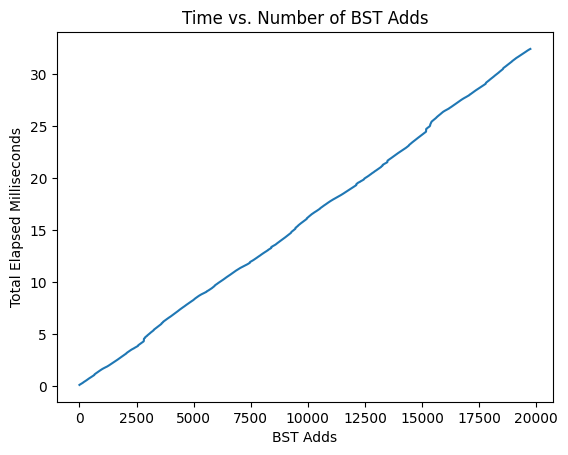

In [11]:
#Q6
num_loans_added = []
time_passed = []
start = time.time()
for i, loan in enumerate(uwcu.loans):
    uwcu_tree.add(loan.interest_rate, loan)
    end = time.time()
    elapsed = (end - start) * 1e3
    num_loans_added.append(i + 1)
    time_passed.append(elapsed)

# Plot the time taken to add loans
plt.plot(num_loans_added, time_passed)
plt.xlabel("BST Adds")
plt.ylabel("Total Elapsed Milliseconds")
plt.title("Time vs. Number of BST Adds")
plt.show()

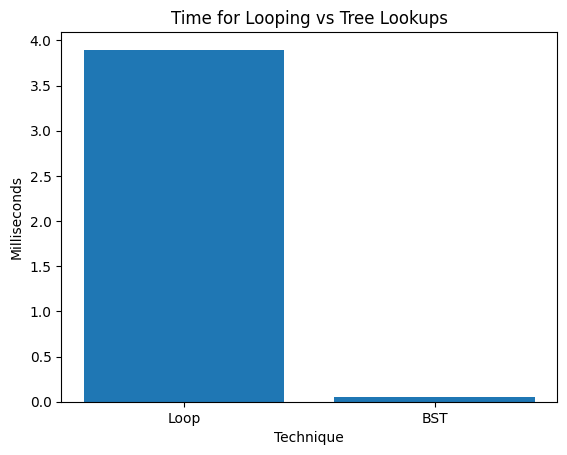

In [12]:
#Q7
time_loop = 0.0
time_bst = 0.0

start = time.time()
missing_interest_rates = [loan for loan in uwcu.loans if loan.interest_rate == -1]
end = time.time()
time_itr = (end - start) * 1e3

start = time.time()
missing_interest_rates_bst = uwcu_tree[-1]
end = time.time()
time_bst = (end - start) * 1e3

technique = ["Loop", "BST"]
times = [time_itr, time_bst]

plt.bar(technique, times)
plt.xlabel("Technique")
plt.ylabel("Milliseconds")
plt.title("Time for Looping vs Tree Lookups")
plt.show()

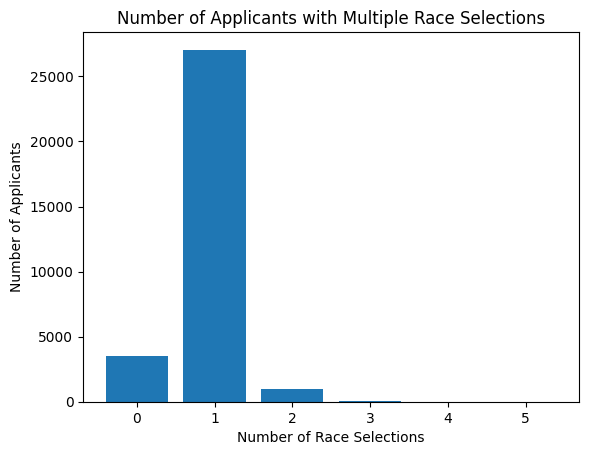

In [13]:
#Q8
race_selection_counts = {}

for loan in uwcu.loans:
    for applicant in loan.applicants:
        num_race_selections = len(applicant.race)
        if num_race_selections not in race_selection_counts:
            race_selection_counts[num_race_selections] = 1
        else:
            race_selection_counts[num_race_selections] += 1

x_values = list(race_selection_counts.keys())
y_values = list(race_selection_counts.values())

plt.bar(x_values, y_values)
plt.xlabel("Number of Race Selections")
plt.ylabel("Number of Applicants")
plt.title("Number of Applicants with Multiple Race Selections")
plt.show()

In [14]:
#Q9
def count_leaf_nodes(node):
    
    if node is None:
        return 0
    
    if node.left is None and node.right is None:
        return 1
    
    left_count = count_leaf_nodes(node.left)
    right_count = count_leaf_nodes(node.right)
    
    return left_count + right_count

count_leaf_nodes(uwcu_tree.root)

13

In [15]:
#Q10
def get_top_n_interest_rates(node, n, result=None):
    
    if result is None:
        result = []

    if node is not None:
        get_top_n_interest_rates(node.right, n, result)
        if len(result) < n:
            result.append(node.key)
            get_top_n_interest_rates(node.left, n, result)

    return result

get_top_n_interest_rates(uwcu_tree.root, 5)[-1]

6.49